In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [ ]:
data = pd.read_csv('/content/wdbc.csv')
print(data)

           ID Diagnosis      a      b       c       d        e        f  \
0      842302         M  17.99  10.38  122.80  1001.0  0.11840  0.27760   
1      842517         M  20.57  17.77  132.90  1326.0  0.08474  0.07864   
2    84300903         M  19.69  21.25  130.00  1203.0  0.10960  0.15990   
3    84348301         M  11.42  20.38   77.58   386.1  0.14250  0.28390   
4    84358402         M  20.29  14.34  135.10  1297.0  0.10030  0.13280   
..        ...       ...    ...    ...     ...     ...      ...      ...   
564    926424         M  21.56  22.39  142.00  1479.0  0.11100  0.11590   
565    926682         M  20.13  28.25  131.20  1261.0  0.09780  0.10340   
566    926954         M  16.60  28.08  108.30   858.1  0.08455  0.10230   
567    927241         M  20.60  29.33  140.10  1265.0  0.11780  0.27700   
568     92751         B   7.76  24.54   47.92   181.0  0.05263  0.04362   

           g        h  ...       u      v       w       x        y        z  \
0    0.30010  0.1471

In [ ]:
data = data.dropna()
# Encoding categorical data
label_encoder = LabelEncoder()
data['Diagnosis'] = label_encoder.fit_transform(data['Diagnosis'])
# Normalization and Standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Diagnosis', axis=1))

In [ ]:
data = data.drop('ID',axis=1)
print(data)

     Diagnosis      a      b       c       d        e        f        g  \
0            1  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010   
1            1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
2            1  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
3            1  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
4            1  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
..         ...    ...    ...     ...     ...      ...      ...      ...   
564          1  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
565          1  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
566          1  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
567          1  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
568          0   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

           h       i  ...       u      v       w       x        y        z  \
0    0.14710  0.2419 

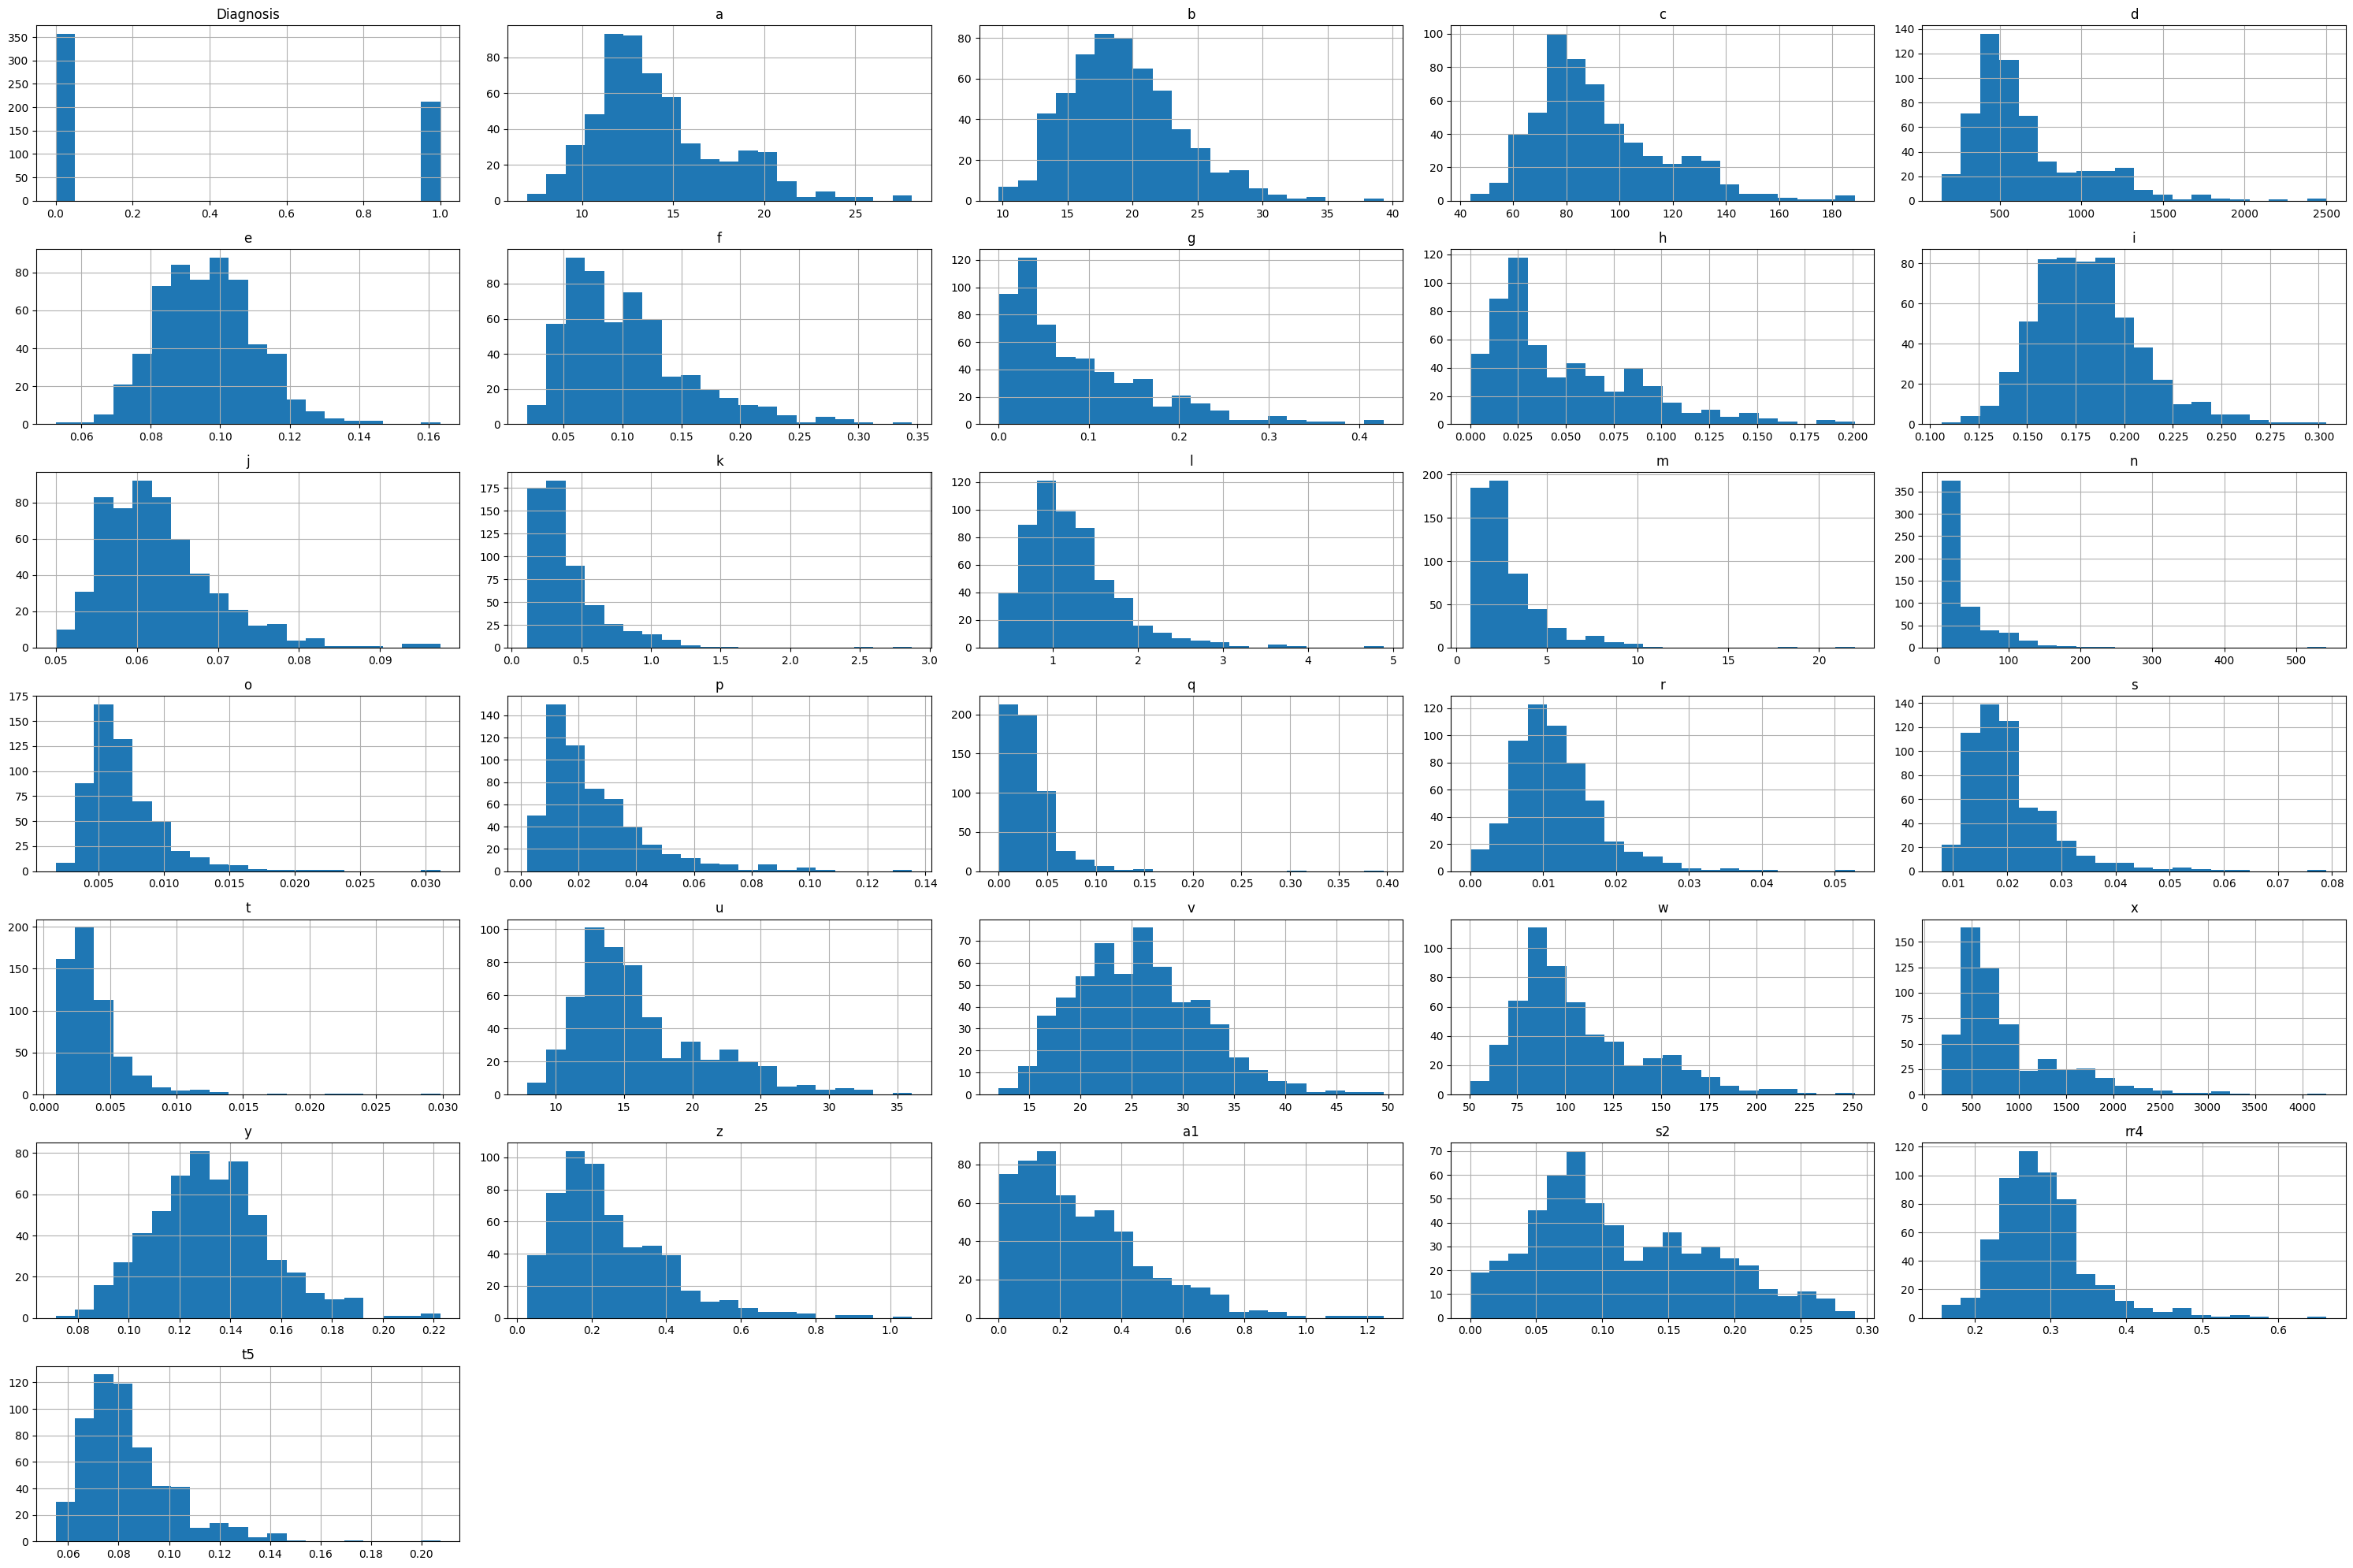

In [ ]:
# Assuming 'data' is your DataFrame and you want to plot histograms for all numerical columns
data.hist(bins=20, figsize=(30, 20), layout=(7, 5))
plt.tight_layout()
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data['Diagnosis'], test_size=0.2, random_state=42)

# Step 6: Train the model using Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 7: Test the model[^7^][7]
rf_predictions = rf_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy of the Random Forest model: {accuracy}")

Accuracy of the Random Forest model: 0.9649122807017544


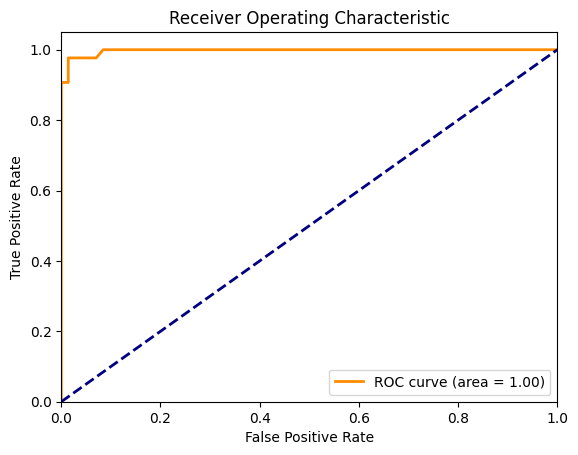

In [ ]:
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming 'X_train' and 'y_train' are your training data and labels respectively

# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create AdaBoost classifier instance
ada_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Fit the model
ada_classifier.fit(X_train, y_train)

ada_predict = ada_classifier.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, ada_predict)
print(f"Accuracy of the Ada Boost model : {accuracy}")

Accuracy of the Ada Boost model : 0.9473684210526315


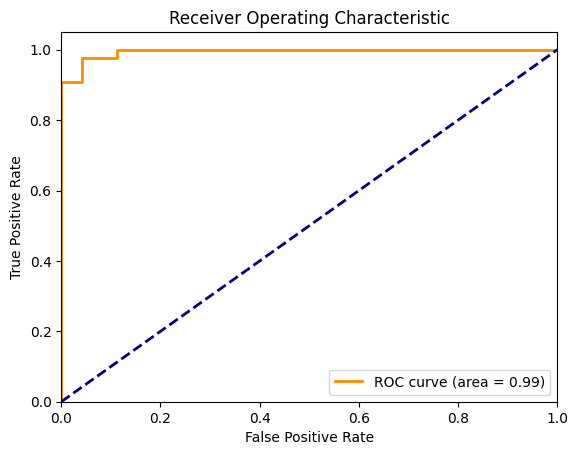

In [ ]:
ada_probs = ada_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test,ada_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.ensemble import BaggingClassifier
base_classifier = DecisionTreeClassifier()

# Create Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)

# Train the model
bagging_classifier.fit(X_train, y_train)

# Make predictions
predictions = bagging_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.956140350877193


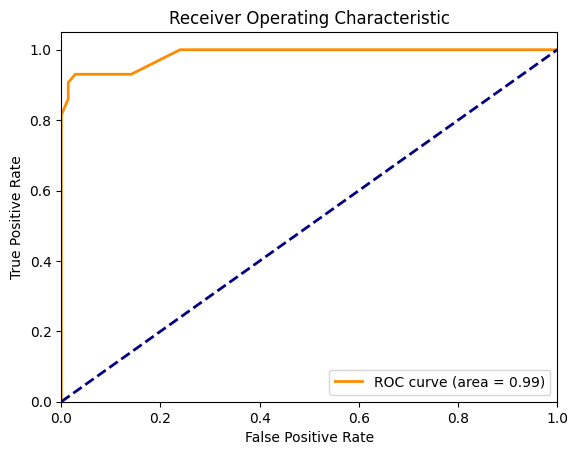

In [ ]:
baggy_probs = bagging_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test,baggy_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Based on the Accuracy and the ROC curve area, the ensemble models from best to worst according to performance are :

1. Random Forest

2. Bagging

3. Ada Boost